In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [ ]:
https://drive.google.com/file/d/1y4gApyw8HURa-j-SNiTWVkzUw8czxOZN/view?usp=sharing

In [63]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1y4gApyw8HURa-j-SNiTWVkzUw8czxOZN

Downloading...
From: https://drive.google.com/uc?id=1y4gApyw8HURa-j-SNiTWVkzUw8czxOZN
To: /content/data.csv
100% 527k/527k [00:00<00:00, 117MB/s]


In [64]:
# Load the dataset from the specified file path
df = pd.read_csv('/content/data.csv')

# Display the first few rows of the DataFrame
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [65]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [66]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [67]:
# Extract the "CarName" column
date = df["date"]

# Count the occurrences of each unique car name
date.value_counts()

2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-07-04 00:00:00      2
2014-05-11 00:00:00      2
2014-05-17 00:00:00      1
Name: date, Length: 70, dtype: int64

In [68]:
# تبدیل ستون 'date' به نوع داده datetime
df['date'] = pd.to_datetime(df['date'])

# اضافه کردن ستون 'ماه'
df['month'] = df['date'].dt.month

# اضافه کردن ستون 'سال'
df['year'] = df['date'].dt.year

# نمایش DataFrame جدید
print(df)

           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
0  

In [69]:
# Drop the specified columns from the DataFrame
df = df.drop(['date', 'country', 'year','street', 'statezip'], axis=1)

In [70]:
# List of specified categorical columns
dummy = ['city']

In [71]:
# Convert categorical columns to numerical using one-hot encoding
df2 = pd.get_dummies(df, columns=dummy, drop_first=True)

In [72]:
# Display the first few rows of the modified DataFrame
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Calculate the correlation between columns and 'price', then sort them in descending order
correlation_matrix = df2.corr()['price'].sort_values(ascending=False)
correlation_matrix

price                       1.000000
sqft_living                 0.430410
sqft_above                  0.367570
bathrooms                   0.327110
view                        0.228504
sqft_basement               0.210427
bedrooms                    0.200336
floors                      0.151461
city_Mercer Island          0.140007
waterfront                  0.135648
city_Bellevue               0.134828
city_Medina                 0.129795
city_Clyde Hill             0.066867
sqft_lot                    0.050451
city_Redmond                0.047612
city_Sammamish              0.047604
month                       0.041081
city_Kirkland               0.036375
city_Seattle                0.035642
condition                   0.034915
city_Yarrow Point           0.033640
yr_built                    0.021857
city_Newcastle              0.017201
city_Woodinville            0.016361
city_Issaquah               0.016139
city_Fall City              0.012220
city_Beaux Arts Village     0.005049
c

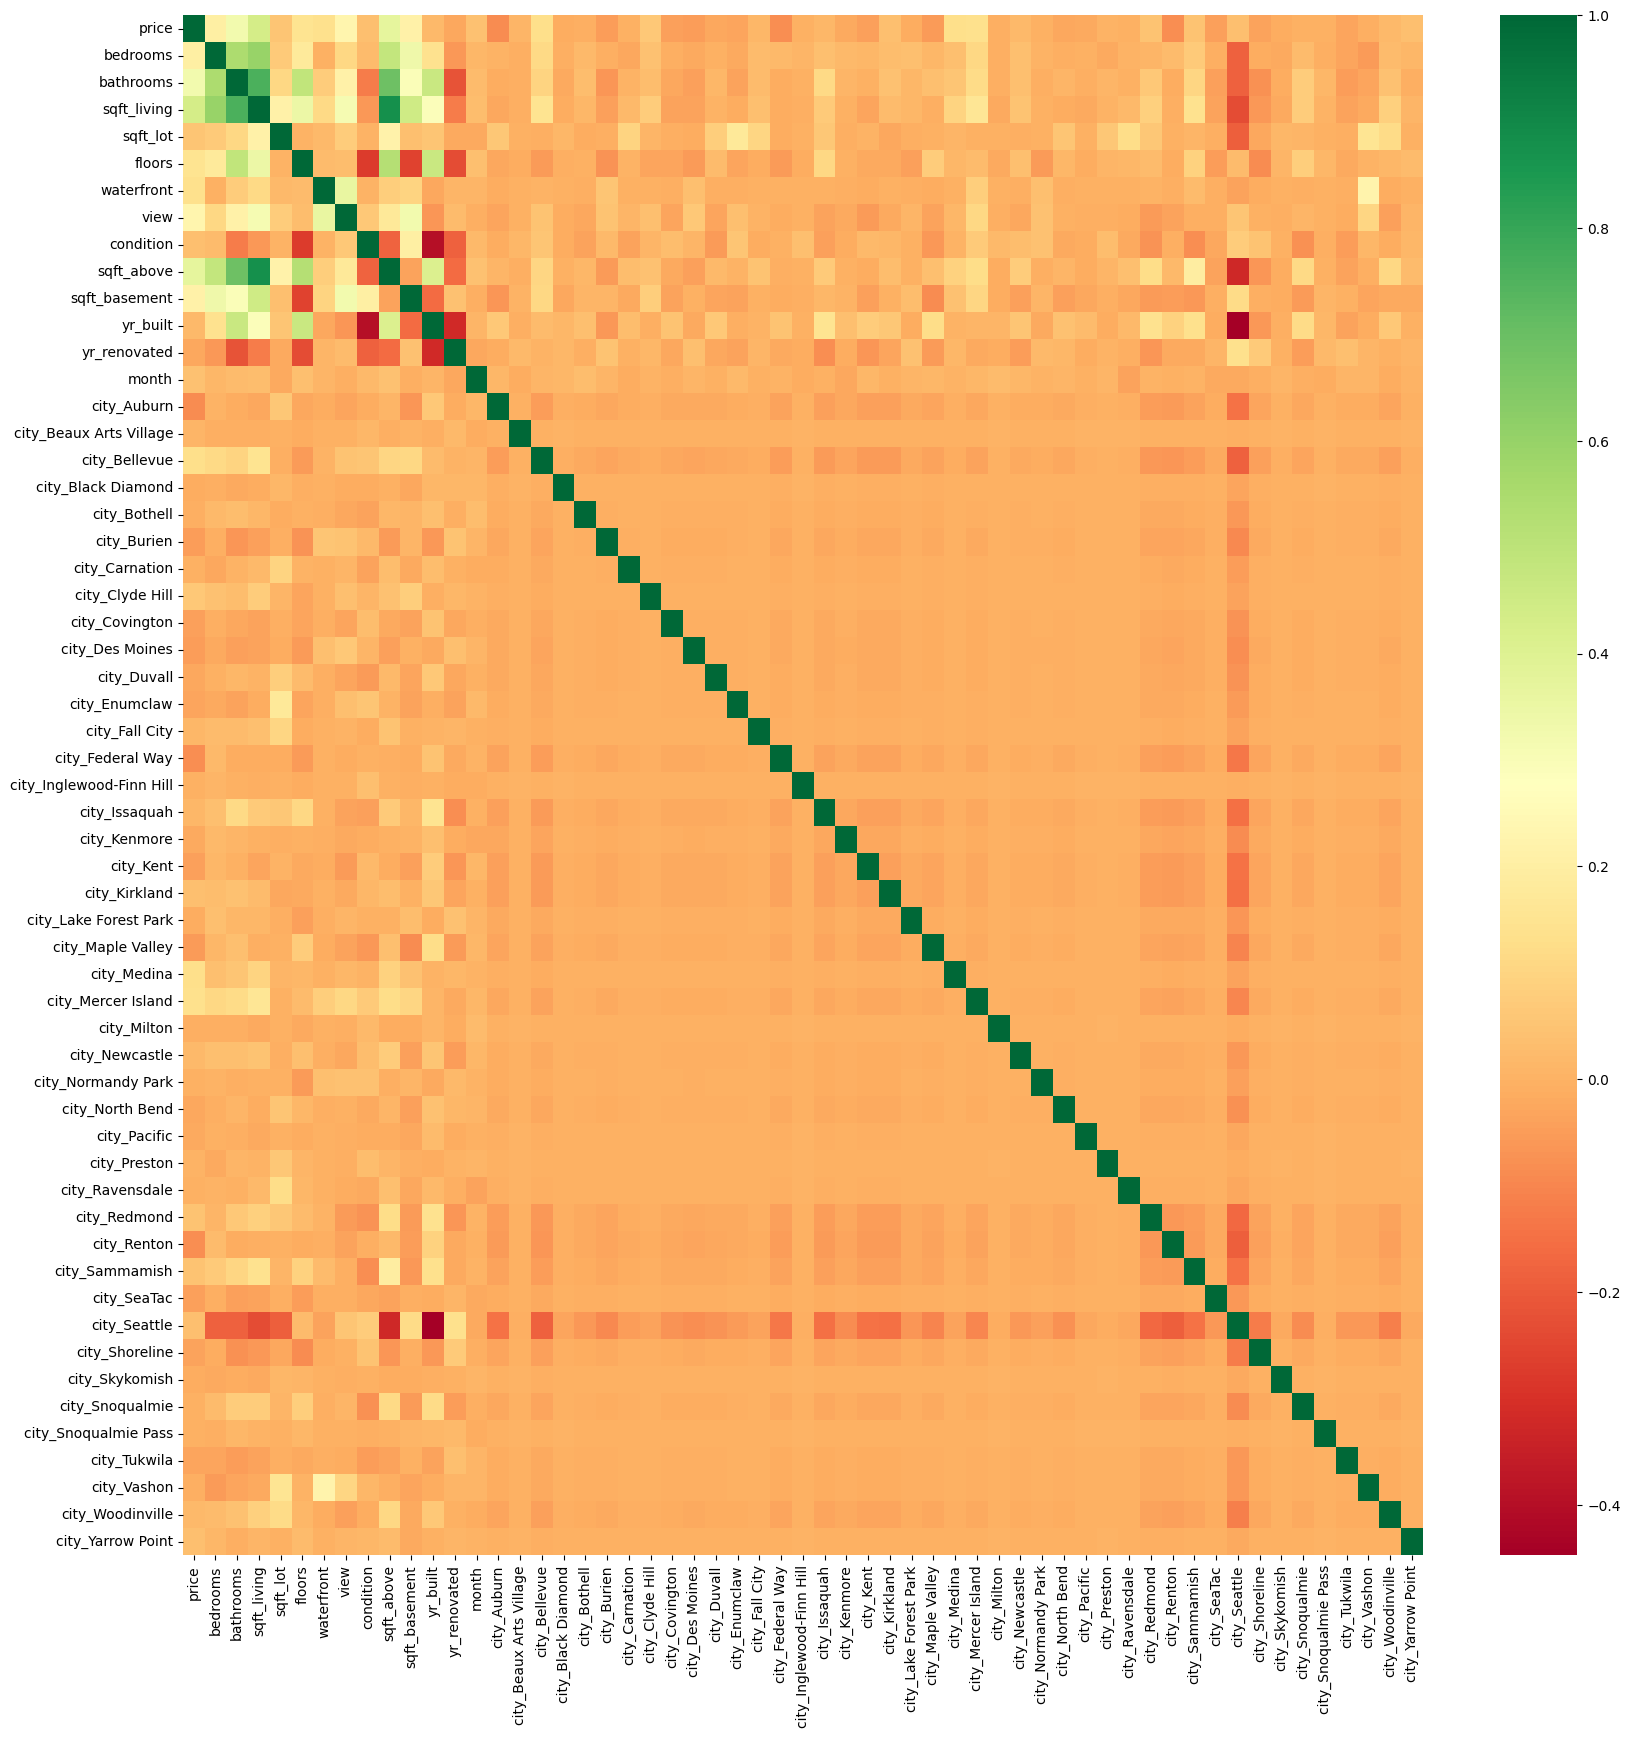

In [74]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(), cmap="RdYlGn")
plt.show()

In [75]:
# Select columns with numerical data types
num = df.select_dtypes(exclude=['object']).columns
num

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'month'],
      dtype='object')

<Axes: >

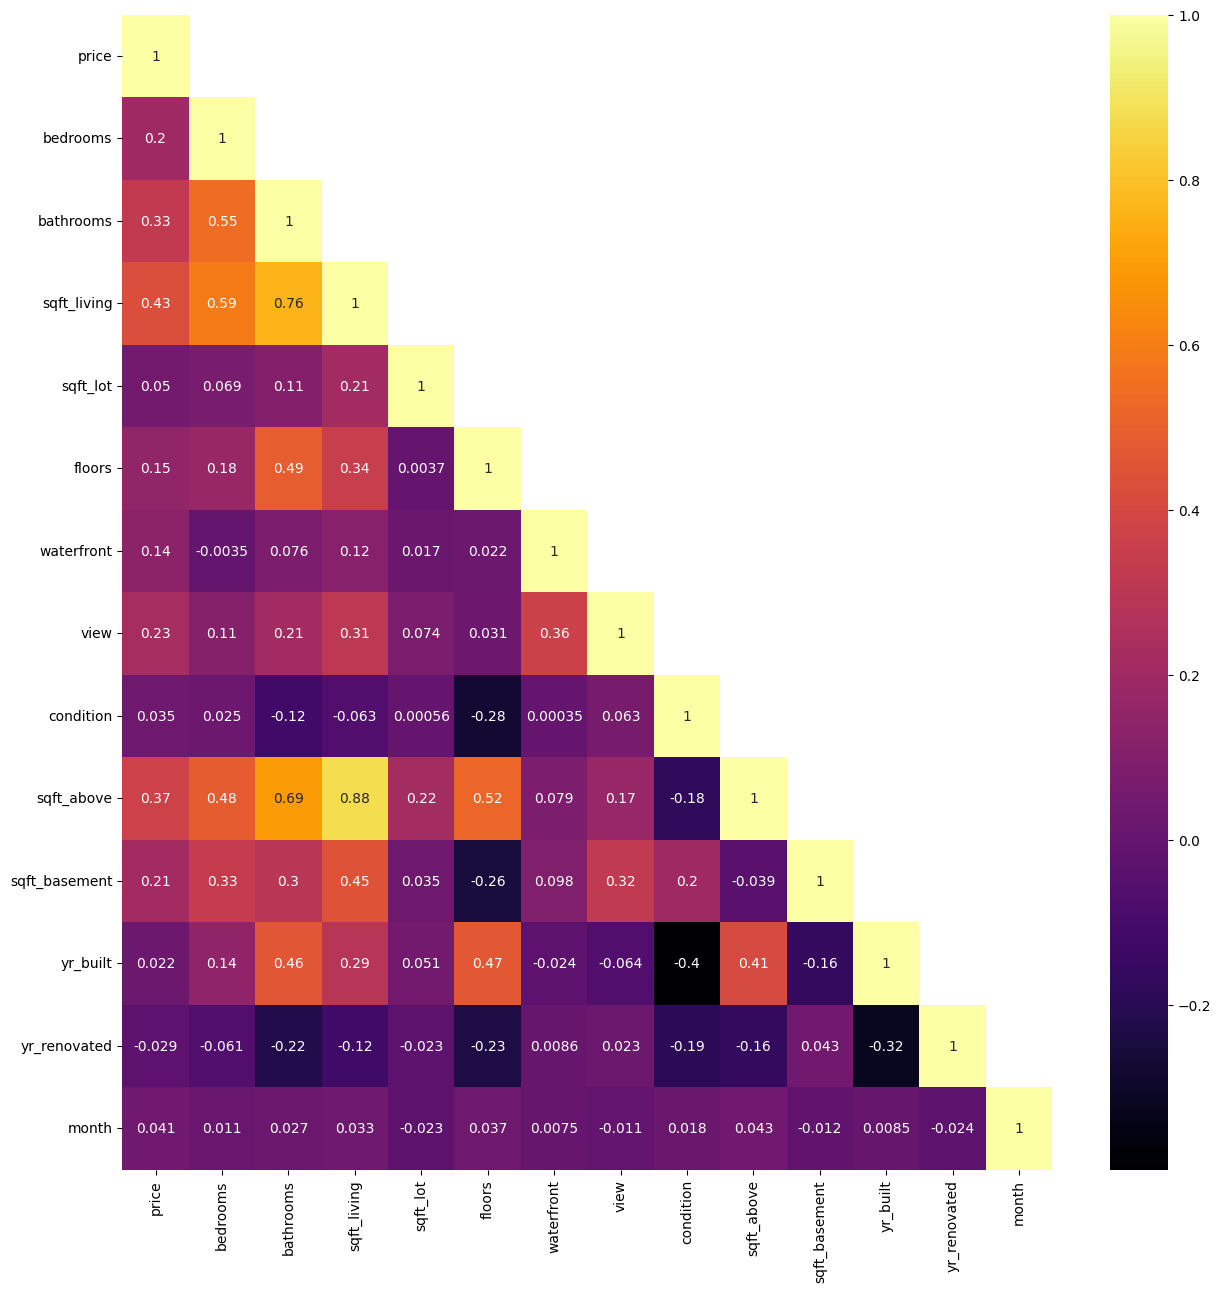

In [76]:
# Create a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(15, 15))
sns.heatmap(df[num].corr(), annot=True, cmap='inferno', mask=np.triu(df[num].corr(), k=1))

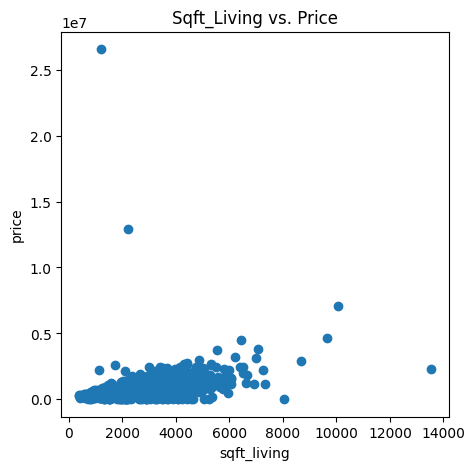

In [77]:
# Create a scatter plot of sqft_living against price
plt.figure(figsize=(5, 5))
plt.scatter(x='sqft_living', y='price', data=df2)
plt.xlabel('sqft_living')
plt.title('Sqft_Living vs. Price')
plt.ylabel('price')
plt.show()

Text(0.5, 1.0, 'price Interval')

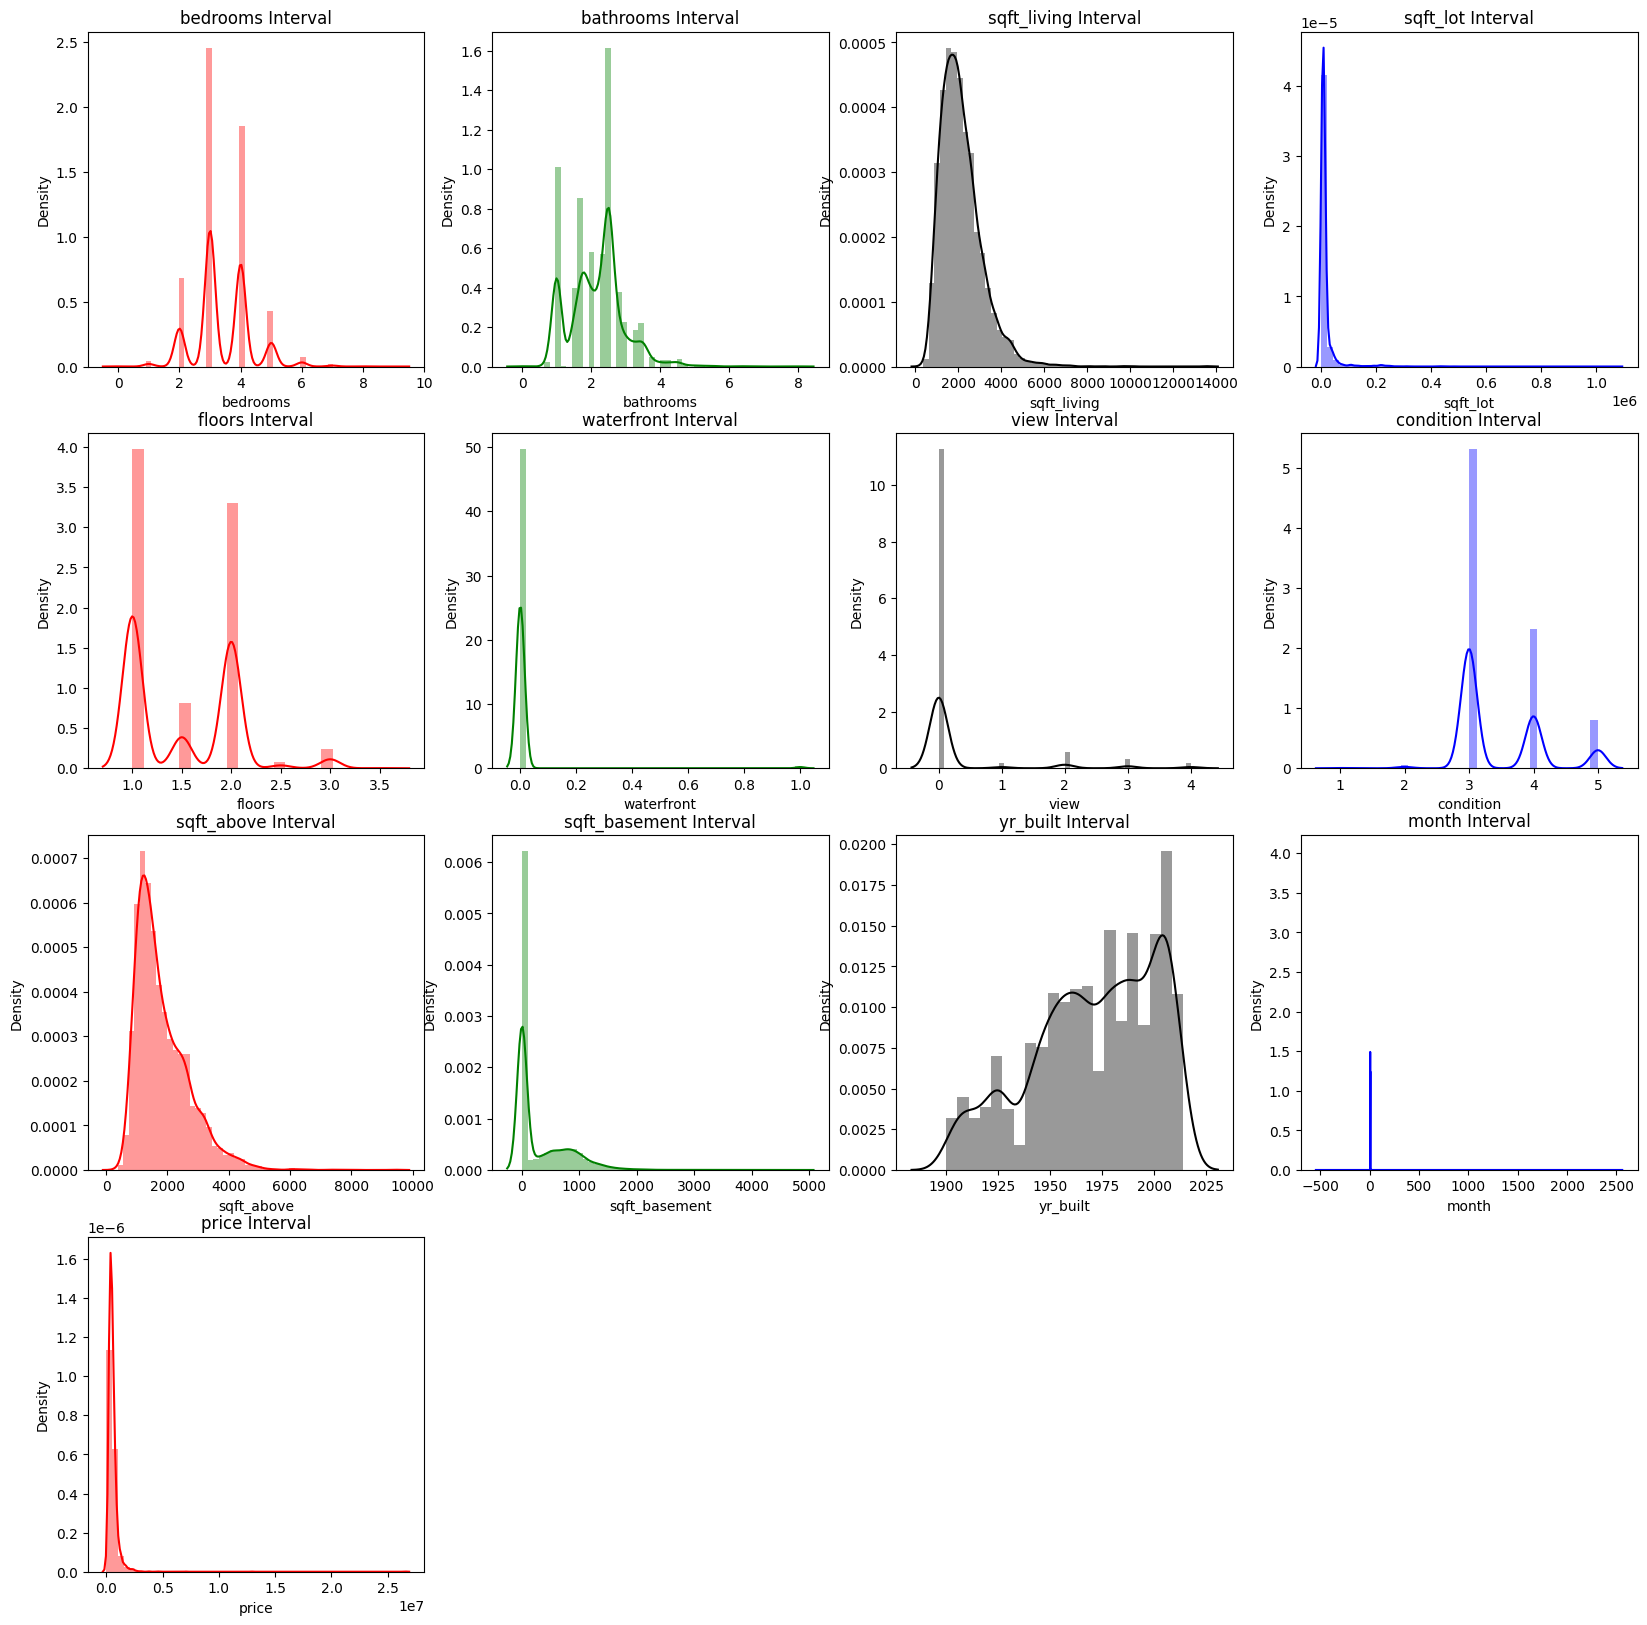

In [78]:
# Create a 4x4 grid of subplots for various numerical variables
plt.figure(figsize=(20, 20))

plt.subplot(4,4,1)
sns.distplot(df['bedrooms'], color="red").set_title('bedrooms Interval')

plt.subplot(4,4,2)
sns.distplot(df['bathrooms'], color="green").set_title('bathrooms Interval')

plt.subplot(4,4,3)
sns.distplot(df['sqft_living'], color="black").set_title('sqft_living Interval')

plt.subplot(4,4,4)
sns.distplot(df['sqft_lot'], color="blue").set_title('sqft_lot Interval')

plt.subplot(4,4,5)
sns.distplot(df['floors'], color="red").set_title('floors Interval')

plt.subplot(4,4,6)
sns.distplot(df['waterfront'], color="green").set_title('waterfront Interval')

plt.subplot(4,4,7)
sns.distplot(df['view'], color="black").set_title('view Interval')

plt.subplot(4,4,8)
sns.distplot(df['condition'], color="blue").set_title('condition Interval')

plt.subplot(4,4,9)
sns.distplot(df['sqft_above'], color="red").set_title('sqft_above Interval')

plt.subplot(4,4,10)
sns.distplot(df['sqft_basement'], color="green").set_title('sqft_basement Interval')

plt.subplot(4,4,11)
sns.distplot(df['yr_built'], color="black").set_title('yr_built Interval')

plt.subplot(4,4,12)
sns.distplot(df['yr_renovated'], color="blue").set_title('yr_renovated Interval')

plt.subplot(4,4,12)
sns.distplot(df['month'], color="blue").set_title('month Interval')

plt.subplot(4,4,13)
sns.distplot(df['price'], color="red").set_title('price Interval')

In [79]:
# Initialize LabelEncoder
l1 = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = l1.fit_transform(df2[i])

df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,1,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,1,0,0,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,1,0,0,0,0,0,0,0,0


In [80]:
# Separate input (X) and output (Y) data
X = df2.drop(["price"], axis=1)  # Input data
Y = df2["price"]                  # Output data

In [81]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [82]:
# Print the shapes of the datasets
print("X Train Scaler : ", x_train.shape) # Print shape of x_train
print("X Test Scaler : ",  x_test.shape)  # Print shape of x_test
print("Y Train Scaler : ", y_train.shape) # Print shape of y_train
print("Y Test Scaler : ",  y_test.shape)  # Print shape of y_test

X Train Scaler :  (3680, 56)
X Test Scaler :  (920, 56)
Y Train Scaler :  (3680,)
Y Test Scaler :  (920,)


In [83]:
# Find the maximum value in y_train data
max_1 = y_train.values
maximum = 0
minimum = min(y_train)

# Loop through the elements of y_train
for i in range(x_train.shape[0]):
    if max_1[i] > maximum:
        maximum = max_1[i]

In [84]:
# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)

In [85]:
# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

In [86]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                2850      
                                                                 
 dense_4 (Dense)             (None, 30)                1530      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4411 (17.23 KB)
Trainable params: 4411 (17.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
model_2.compile(optimizer='adam', loss='mse')
history = model_2.fit(x_train, y_train, validation_split=0.15, epochs=300 ,batch_size=100, verbose=0)

In [88]:
#Evaluate the model
loss = model_2.evaluate(x_test , y_test)

29/29 [==============================] - 0s 2ms/step - loss: 8.3767e-05


In [89]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)

rscore_2

29/29 [==============================] - 0s 2ms/step


0.5583630194225643

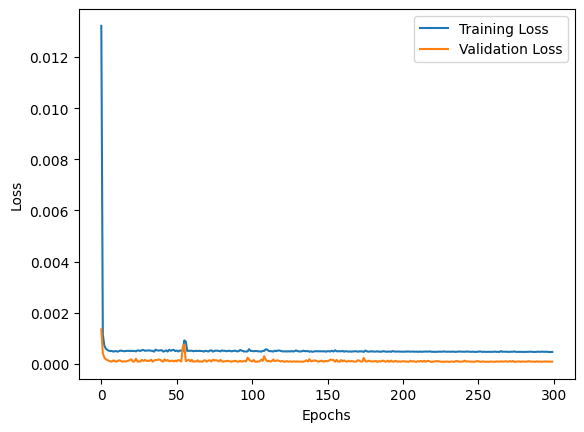

In [90]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

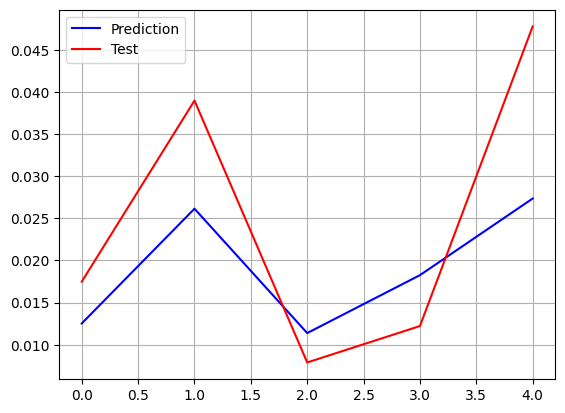

In [91]:
random_pred = list()
random_test = list()
y_test_array = np.array(y_test)
for i in range(5):
  j = random.randint(0, len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test_array[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()